# A Genetic Algorithm for the Generation of Jazz Melodies

## Define Improve Class

In [28]:
import random

class Improv:
    beats: int # Number of beats initialized by the user
    degrees: int # Array consisting degrees
    durations: int # Array consisting proportional durations to degrees
    events_num: int # Number of notes    
        
    def __init__(self, beats, events=False):
        self.beats = beats
        if events==False:
            self.events_num = random.randint(self.beats//2, 4*self.beats) # This is not discussed in the paper
            self.degrees = self.random_degrees()
            self.durations = self.random_durations()
            pass
        
        else:
            self.degrees = events[0]
            self.durations = events[1]
            self.events_num = len(events[0])
            pass
    
    def random_degrees(self):
        note_sample = list(range(1, 21)) + [0]*3 # Give rest more chance to be chosed
        return random.sample(note_sample*self.events_num, self.events_num)
    
    def random_durations(self):
        # self.events_num positive integers shoud be found to have a summation of self.beats*4
        # For that we randomly cut self.beats*4 into self.events_num parts
        boundaries = [0] + sorted(random.sample(range(1, self.beats*4), self.events_num-1)) + [self.beats*4]
        durations = [boundaries[i+1] - boundaries[i] for i in range(self.events_num)]
        random.shuffle(durations)
        return durations
    
    def evaluate(self, fitness):
        self.fitness = fitness
        pass
    

## Define Fitness Function Based on the Criteria Defined in the Paper

In [29]:
from collections import Counter

class Fitness:
    
    def __init__(self, w_large_intervals, max_interval, \
                 w_downbeat, w_halfbar, w_long_notes, max_ninterval, \
                 w_pattern_matching, len_pattern):
        
        self.w_large_intervals = w_large_intervals
        self.max_interval = max_interval
        self.w_downbeat = w_downbeat
        self.w_halfbar = w_halfbar
        self.w_long_notes = w_long_notes
        self.max_ninterval = max_ninterval
        self.w_pattern_matching = w_pattern_matching
        self.len_pattern = len_pattern
        pass
    
    def evaluate(self, improv):
        score = - (self.e_large_intervals(self.max_interval, improv) * self.w_large_intervals) \
                + (self.e_downbeat(improv) * self.w_downbeat) \
                + (self.e_halfbar(improv) * self.w_halfbar) \
                - (self.e_long_notes(self.max_ninterval, improv) * self.w_long_notes) \
                + (self.e_pattern_matching(self.len_pattern, improv) * self.w_pattern_matching)
        return score
    
    def e_large_intervals(self, max_interval, improv):
        miss = 0
        for i in range(len(improv.degrees)-1):
            if improv.degrees[i]!=0 or improv.degrees[i+1]!=1: miss += abs(improv.degrees[i+1]-improv.degrees[i]) > max_interval
        return miss
    
    def e_downbeat(self, improv):
        hit = 0
        inbit = 0
        for i in range(len(improv.degrees)):
            if improv.degrees[i]!=0 and inbit%16==0: # 16=4*number of bits in a measure(=4)
                hit +=1
            inbit += improv.durations[i]
        return hit
    
    def e_halfbar(self, improv):
        halfhit = 0
        inbit = 0
        for i in range(len(improv.degrees)):
            if improv.degrees[i]!=0 and inbit%16==8: # 8 is poiting at the half bar
                halfhit += 1
            inbit += improv.durations[i]
        return halfhit
    
    def e_long_notes(self, max_ninterval, improv):
        miss = 0
        for i in range(len(improv.durations)):
            if improv.degrees[i]!=0: miss += improv.durations[i] > max_ninterval
        return miss
    
    def e_pattern_matching(self, len_pattern, improv):
        hit = 0
        for i in range(len(improv.degrees) - len_pattern + 1):
            pattern = tuple(improv.degrees[i:i+len_pattern])
            hit += Counter(tuple(improv.degrees[j:j+len_pattern]) for j in range(i+1, len(improv.degrees) - len_pattern+1))[pattern]
        return hit

## Evaluate the Fitness Function

In [40]:
# Define two random inprovisations in 8 bits (4/4)
A, B = Improv(8), Improv(8)

In [41]:
# Print the initialization
def print_improv(improv, name):
    print("Improvisation Tune: ", name)
    print("Degrees:  ", improv.degrees)
    print("Durations:", improv.durations)
    print("-"*100)
    pass

print_improv(A, "A")
print_improv(B, "B")

Improvisation Tune:  A
Degrees:   [15, 1, 10, 1, 8, 19, 8, 9, 16, 15, 4]
Durations: [3, 1, 1, 3, 3, 5, 5, 3, 1, 5, 2]
----------------------------------------------------------------------------------------------------
Improvisation Tune:  B
Degrees:   [10, 9, 0, 0, 14, 2, 14, 20, 14, 18, 16, 10]
Durations: [2, 4, 3, 3, 3, 4, 4, 3, 3, 1, 1, 1]
----------------------------------------------------------------------------------------------------


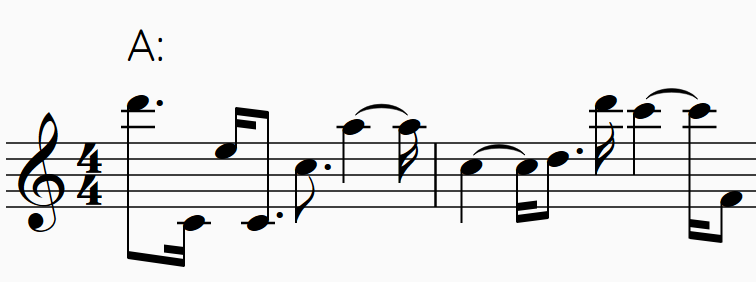

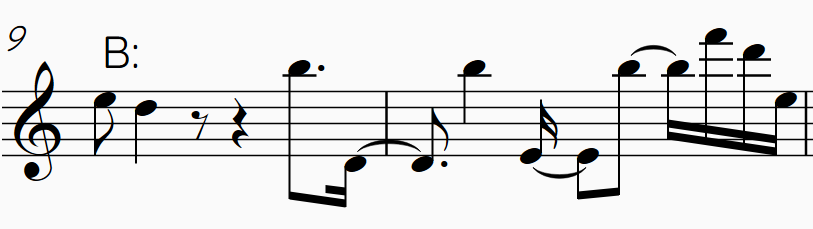

In [63]:
# Caluculate the fitness of 
F = Fitness(1,10,1,1,2,8,2,3)

print("Fitness of A: ", F.evaluate(A))
print("Fitness of B: ", F.evaluate(B))

Fitness of A:  0
Fitness of B:  -2


In [64]:
# Now we define the famous lick: "The lick"
TheLick = Improv(8, [[2, 3, 4, 5, 3, 1, 2], [2, 2, 2, 2, 4, 2, 18]])

In [65]:
# Print the lick
print_improv(TheLick, "The Lick")

Improvisation Tune:  The Lick
Degrees:   [2, 3, 4, 5, 3, 1, 2]
Durations: [2, 2, 2, 2, 4, 2, 18]
----------------------------------------------------------------------------------------------------


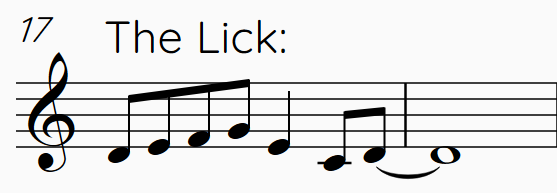

In [66]:
print("Fitness of The Lick: ", F.evaluate(TheLick))

Fitness of The Lick:  0
